<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_spring_2023/blob/main/exercises/Phys_2320_exercise_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Consider a mass attached to a spring that allows the mass to oscillate about its **equilibrium position" $x_0 = 0$ meters** as shown below:

&ensp;&ensp;&ensp;(The equilibrium position is that in which the spring is neither compressed nor elongated.)

.

* In **panel (d)**, the mass is at $x_0$ and has maximum velocity moving to the right. As soon as the mass is to the right of the equilibrium position, the spring is elongated and produces a force in the negative direction.

. 

* The spring force $F_s$ increases in magnitude with the elongation of the spring according to Hooke's law, $F_s = -k \Delta \vec{x}$, were $k$ is the spring constant and $\Delta \vec{x}$ is the displacement from equilibrium. Since the velocity is in the positive direction and the acceleration is in the negative direction, the mass eventually stops at some distance $A$ from equilibrium, as shown in **panel (a)**. 

.

* In this example there is also a **Friction Force** $\vec{f_k}$ in the direction opposite to the velocity. 

.

 
 * There is still a force pulling the mass towards the origin, so the mass will accelerate in the negative direction, with an acceleration that is decreasing in magnitude until it becomes zero at the origin. At this stage, the velocity will be maximal and in the negative direction, as shown in **panel (b)**. 

.

* As soon as the mass is to the left of the equilibrium position, the spring is compressed and produces a force in the positive direction according to Hooke's law. Since the velocity is in the negative direction and the acceleration is in the positive direction, the mass eventually stops at some distance $-A$ from equilibrium, as shown in **panel (c)**. 

.

* The whole cycle then repeats, but each time with less energy since the friction is always removing energy from the system. This is a [damped harmonic oscillator](https://en.wikipedia.org/wiki/Harmonic_oscillator). 

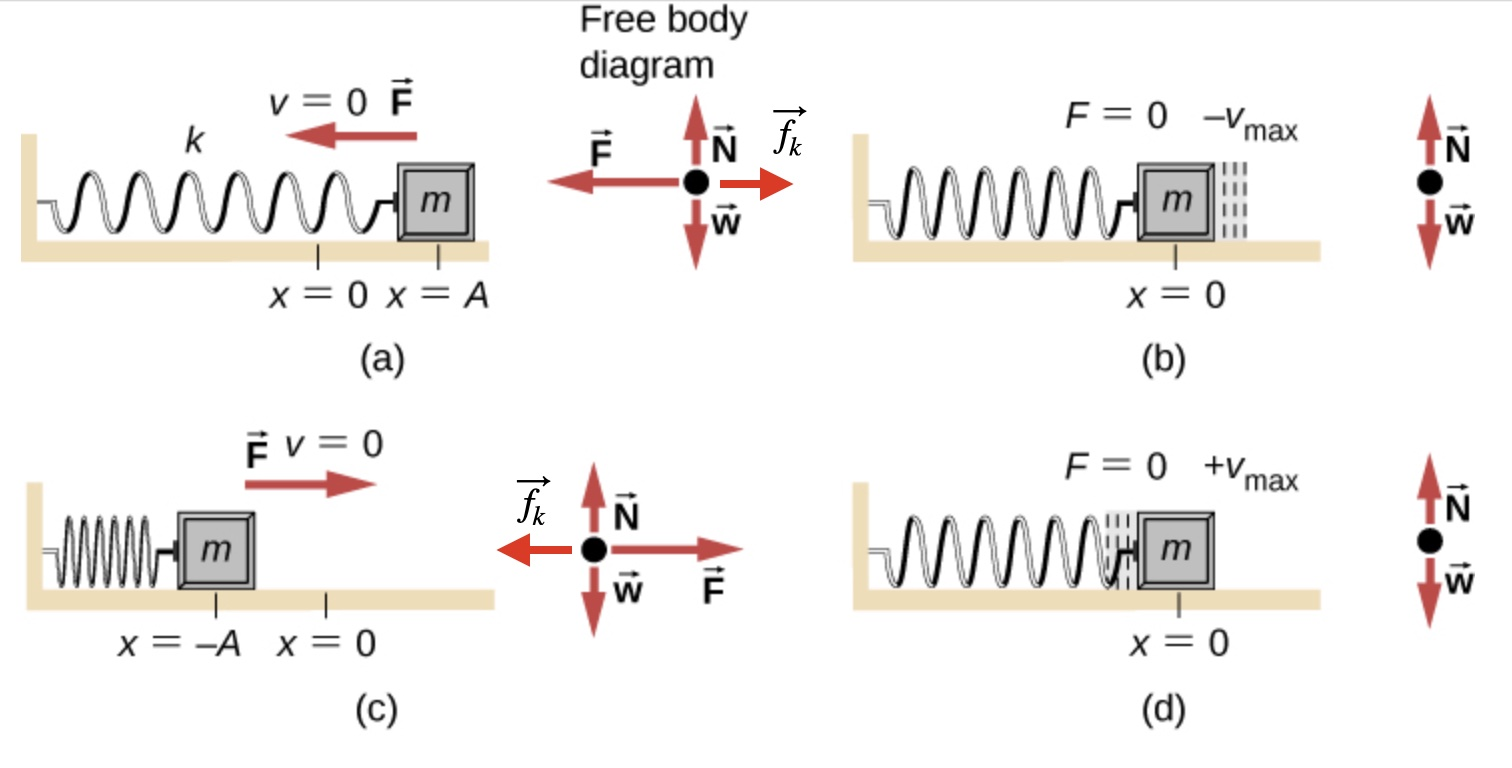

For this exercise, you will combine the main concepts that you have learned so far in this class: kinematic equations, forces, and conservation of energy. 

You will simulate a **mass of $m=1$ kg** attached to a one-dimensional spring of **spring constant $k=1$ N/m** oscillating about its equilibrium position and in the **presence of Friction**:

* The **equilibrium position will be $x_0 = 0$ m and at time $t=0$ s**,

*  The mass will be at its equilibrium and will be moving to the right at a **Velocity of $v=1$ m/s**. 

* Since the **Spring force $F_s=0$** at the equilibrium position, the **acceleration at $t=0$ is $a=0$ m/s$^2$**. 

Just as we did with the Simple Harmonic Oscilator; to begin, we must first set these initial conditions by giving appropriate values to the python variables. 

(We initialize the coefficient of kinetic friction, $\mu_k = 0.001$.)

In [ ]:
# Make our lives easier
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Initialization
position = 0.0 # position in meters
velocity = 1.0 # velocity in meters per second
acceleration = 0.0 # acceleration in meters per second^2
netforce = 0.0 # net-force in Newtons
time = 0.0 # time in seconds
spring_constant = 1.0 # force constant in kg/second^2
mass = 1.0 # mass in kg
time_step = 0.001 # time step in seconds
g = 9.8 # acceleration due to gravity m/s^2
mu = 0.001 # coefficient of kinetic friction

* The following *molecular dynamics* code uses the kinematic equations to continually update the position, velocity and, through Hooke's law  and a "phenomenological model" for the friction, the acceleration of the mass. 

* The kinematic equations arise from integrating the equations of motion with constant acceleration, which does not occur in the case of the mass/spring system since the force (and hence the acceleration) is a function of the displacement. 

* Nevertheless, the acceleration is constant if the time step we consider is infinitesimally small. A computer can approximate this by using very small time steps. For our simulation, a time step $\Delta t = 0.01$ s produces good results. The results are plotted below the code.

In [ ]:
# Creating Arrays
time_list = [time] # Declare an array varible to store "time data"
position_list = [position] # Declare array variable to store "Position data"
velocity_list = [velocity] # Declare array varible to store "Velocity data"
acceleration_list = [acceleration] # Declare array variable to store "Accelration data"
netforce_list = [netforce] # Declare array variable to store our "net force data"


i=1 # Index variable "i" Initialized to "1"

# Starting Loop
while i < 200000:
    time = time + time_step # Variable "time"  will increment from 1 to 199,999 (almost 200,000 times!)
    position = position + velocity*time_step + (1/2)*(acceleration*time_step**2)  # xf = xi + (1/2)* a * Δt^2
    velocity = velocity + acceleration*time_step # vf = vi + a * Δt
    spring_force = -spring_constant*position

    if velocity < 0: #  if obejct is moving to the left, then
      friction_force = mu*mass*g  # (fk) = -ͷk * m * g | Approximate friction force to the right
      
    else: # if object is moving to the right, then
      friction_force = -mu*mass*g # (fk) = -ͷk * m * g | Approximate friction force to the left


    netforce = spring_force + friction_force # Net Force is derived from the sum of (spring force) - (Friction force) at each time-step

 # After calculating for "Position, Velocity, Net-Force, and Acceleration" at each timestep, we store the data in our array variables from earlier.
    acceleration = netforce/mass
    time_list.append(time)
    position_list.append(position)
    velocity_list.append(velocity)
    acceleration_list.append(acceleration)
    netforce_list.append(netforce)

    i = i + 1 # Increment the Index Variable (i)
    
    # End "While" Loop

<Axes: xlabel='time (s)', ylabel='position (m)'>

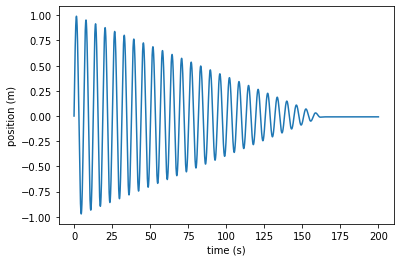

In [ ]:
position_series = pd.Series(position_list, index=time_list)
position_series.plot(ylabel="position (m)", xlabel="time (s)")

<Axes: xlabel='time (s)', ylabel='velocity (m/s)'>

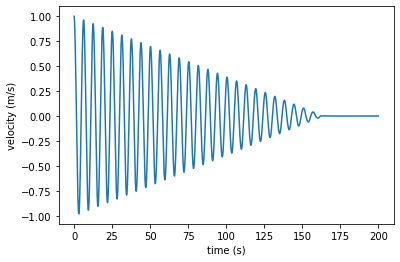

In [ ]:
velocity_series = pd.Series(velocity_list, index=time_list)
velocity_series.plot(ylabel="velocity (m/s)", xlabel="time (s)")

<Axes: xlabel='time (s)', ylabel='acceleration (m/s^2)'>

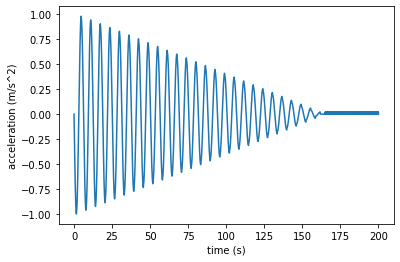

In [ ]:
acceleration_series = pd.Series(acceleration_list, index=time_list)
acceleration_series.plot(ylabel="acceleration (m/s^2)", xlabel="time (s)")

<Axes: xlabel='time (s)', ylabel='force (N)'>

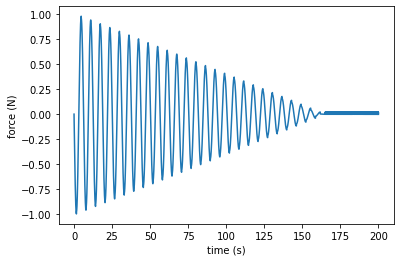

In [ ]:
netforce_series = pd.Series(netforce_list, index=time_list)
netforce_series.plot(ylabel="force (N)", xlabel="time (s)")

<Axes: xlabel='position (m)', ylabel='velocity (m/s)'>

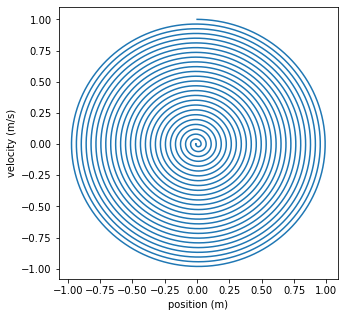

In [ ]:
phase_series = pd.Series(velocity_series.values, index=position_series.values)
phase_series.plot(xlabel="position (m)", ylabel="velocity (m/s)", figsize=(5,5))

* The mass has maximum velocity $v_{\rm max}$ at the equilibrium position, whereas the velocity is zero at the maximum displacement on either side $|x_{\rm max}|= A$.

* Since the kinetic energy is $K = \frac{1}{2}mv^2$ and the spring potential energy is $U = \frac{1}{2}k \Delta x^2$, the kinetic energy is maximum at the equilibrium position (where the potential energy is zero) and the potential energy is maximum at the position extrema (where the kinetic energy is zero).

* Since energy is conserved in an isolated system, the nature of the energy in the mass/spring harmonic motion system is always oscillating between kinetic and potential. 

* Nevertheless, because of friction, this system is always losing energy, so $|x_{\rm max}|= A$ is always getting smaller.

Below, we use the list of positions and velocities generated by the dynamics simulation to **compute the potential and kinetic components of the total energy as a function of time and as a function of the position**:

In [ ]:
spring_potential_energy_list = [] # Declare array variable to store "Potential energy data"
for step in range(len(time_list)): # "For loop" that will iterate for every value stored in our "time" array. 
  spring_potential_energy = (1/2) * spring_constant * position_list[step]**2   # U = (1/2) * k * Δx^2
  spring_potential_energy_list.append(spring_potential_energy) # store computed data into our "potential energy array"

<Axes: xlabel='time (s)', ylabel='potential energy (Joules)'>

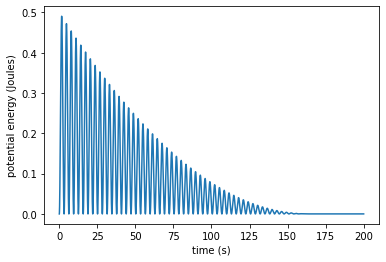

In [ ]:
spring_potential_energy_time_series = pd.Series(spring_potential_energy_list, index=time_list) # Plot Potential energy VS Time graph from computed data
spring_potential_energy_time_series.plot(xlabel="time (s)", ylabel="potential energy (Joules)")

<Axes: xlabel='position (m)', ylabel='potential energy (Joules)'>

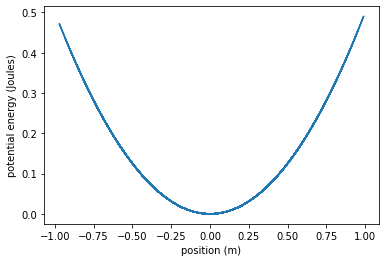

In [ ]:
spring_potential_energy_position_series = pd.Series(spring_potential_energy_list, index=position_list) # Plot Potential VS Position data graph from computed data
spring_potential_energy_position_series.plot(xlabel="position (m)", ylabel="potential energy (Joules)")

In [ ]:
kinetic_energy_list = [] # Declare array variable to store "Kinetic energy data"
for step in range(len(time_list)): # "For loop" that will iterate for every value stored in our "time" array.
  kinetic_energy = (1/2) * mass * velocity_list[step]**2   # K = (1/2) * m * v^2
  kinetic_energy_list.append(kinetic_energy) # store computed data into our "kinetic energy array"

<Axes: xlabel='time (s)', ylabel='kinetic energy (Joules)'>

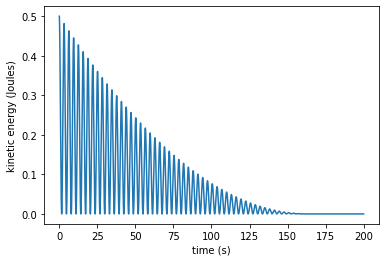

In [ ]:
kinetic_energy_time_series = pd.Series(kinetic_energy_list, index=time_list) # Plot Kinetic VS Time graph from computed data
kinetic_energy_time_series.plot(xlabel="time (s)", ylabel="kinetic energy (Joules)")

<Axes: xlabel='position (m)', ylabel='kinetic energy (Joules)'>

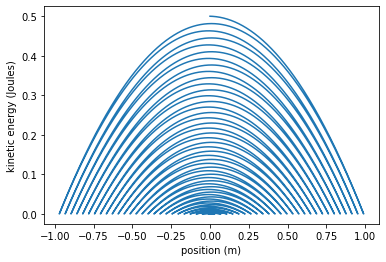

In [ ]:
kinetic_energy_position_series = pd.Series(kinetic_energy_list, index=position_list) # Plot Kinetics VS Position graph from computed data 
kinetic_energy_position_series.plot(xlabel="position (m)", ylabel="kinetic energy (Joules)")

<Axes: xlabel='time (s)', ylabel='total energy (Joules)'>

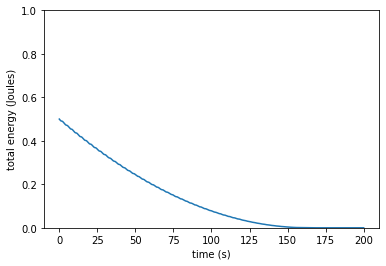

In [ ]:
# This block of code calculates and graphs the sum of Kinetic and Potential energies at each time-step 

total_energy_time_series = spring_potential_energy_time_series + kinetic_energy_time_series # E = U + K 
total_energy_time_series.plot(ylim=(0,1), xlabel="time (s)", ylabel="total energy (Joules)") # plot Energy VS Time graph from computed data

## Action items

1. Set the variable mu = 0.002 and run the code again. What happens to $x(t)$, $v(t)$, and $a(t)$? Explain in terms of forces.  

2. Set the variable mu = 0.005 and run the code again. What happens to $x(t)$, $v(t)$, and $a(t)$? Explain in terms of conservation of energy. 

3. How does the curve of the spring potential energy over time look like? Describe its behavior as time progresses.

4. How does the curve of the kinetic energy over time look like? Describe its behavior as time progresses.

5. How does the curve of the total energy look like? Is energy conserved? Why yes or why not. 